<a href="https://colab.research.google.com/github/gb999/LuaLuaLua/blob/visualization/LuaLuaLua.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Getting the data

1. To download competition data from Kaggle the rules of the competition have to be accepted [here](https://www.kaggle.com/competitions/nlp-getting-started/data), by joining the competition.

2. After that, an API key has to be obtained.
Follow these [instructions](https://www.kaggle.com/docs/api) to do so.

3. Create a new secret named `kaggle.json` in Google Colab, copy the contents of the downloaded file into the value field. Enable Notebook access, and you are ready to go.





In [42]:
from google.colab import userdata
import json, os
kaggle_path = '/root/.config/kaggle'
kaggle_json = userdata.get('kaggle.json')
os.makedirs(kaggle_path, exist_ok=True)

with open(kaggle_path + '/kaggle.json', 'w') as f:
    f.write(kaggle_json)

os.chmod(kaggle_path + '/kaggle.json', 0o600)


In [43]:
!pip install kaggle --quiet
!kaggle competitions download -c nlp-getting-started -q
!unzip -o nlp-getting-started.zip

Archive:  nlp-getting-started.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


# Processing the data



In [44]:
# Load DataFrames
import pandas as pd
from collections import Counter
import re
import matplotlib.pyplot as plt

train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

## Cleaning the data





Text cleaning is an essential preprocessing step in word vectorization, as it removes noise that can interfere with meaningful analysis. This often includes eliminating stopwords and punctuation, which don't add significant value to word embeddings, and converting text to lowercase to ensure consistency across words. By focusing on essential terms, this cleaning process enhances the quality and accuracy of word vector models.

*Stopwords are for example: of, for, with haven't, by...*

Stopwords are obtained from the 'nltk' module.

### Steps:
1. Replace links with the word '[link]'
1. Keep only letters and square brackets.
1. Remove stopwords



In [45]:
!pip install nltk --quiet

In [46]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
print(stop_words)

{"you're", 'do', 'herself', 'by', 'all', 'in', "wasn't", 'or', 'me', 'there', 'is', 'during', 'm', 'mustn', "aren't", 'ourselves', 'they', 'both', 'of', 'up', "hasn't", 'at', 'shan', 'their', 'against', 'doesn', 'more', "shouldn't", 'to', 'any', "wouldn't", 'why', 'him', 'ain', 'until', 'those', 'how', "hadn't", 'shouldn', 'own', 'o', 'my', 'are', 'off', 'that', 'an', 'about', 'won', 'them', 'ma', 'while', 'had', 'each', 'hadn', 'under', 'nor', 'whom', 'same', 'here', 'what', 'below', 'very', 'needn', 'she', 'hers', 'it', 'as', 'haven', 'am', 'no', "won't", "you'll", 'you', 'having', 'his', 'because', 'just', 'now', 'with', 'doing', "you'd", 'don', 'who', 'before', 'll', 'be', 'but', 'yourself', 'for', 'your', 'so', 'only', 'd', 're', 'we', 'itself', 'then', 've', "that'll", 'these', 'will', 'where', 'should', 'too', 'i', 'themselves', 'mightn', 's', 'after', 'myself', 'been', "should've", 'aren', 'hasn', 'above', 'some', 'if', 'was', "it's", 'isn', 'into', 'through', 'couldn', 'weren'

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [62]:
# Remove or replace links in a string.
def remove_links(text, replace=''):
  text = re.sub(r'http\S+', replace, text)
  return text

def remove_retweets(text):
    return re.sub(r'^RT\s+@\w+', '', text, flags=re.IGNORECASE)

In [48]:
import re
import string

# Replaces links and removes retweets and stopwords from a tweet
def clean_tweet(tweet, remove_stopwords=True, stop_words = set(), replace_links = ''):
  tweet = remove_links(tweet, replace_links)
  tweet = remove_retweets(tweet)
  words = re.findall(r"[A-Za-z\[\]]+", tweet.lower())  # Keep letters and square brackets

  if remove_stopwords:
    words = [word for word in words if word not in stop_words]

  return ' '.join(words)

def clean_tweets(lines, remove_stopwords=True, stop_words=set()):
  cleaned_lines = []
  for line in lines:
    cleaned_line = clean_tweet(line, remove_stopwords, stop_words)
    cleaned_lines.append(cleaned_line)

  return cleaned_lines

## Process the whole dataset


In [49]:
train_df['text'] = train_df['text'].apply(lambda t: clean_tweet(t, remove_stopwords=True, stop_words= stop_words, replace_links="[link]"))
test_df['text'] = test_df['text'].apply(lambda t: clean_tweet(t, remove_stopwords=True, stop_words= stop_words, replace_links="[link]"))

print(train_df.head())

   id keyword location                                               text  \
0   1     NaN      NaN       deeds reason earthquake may allah forgive us   
1   4     NaN      NaN              forest fire near la ronge sask canada   
2   5     NaN      NaN  residents asked shelter place notified officer...   
3   6     NaN      NaN  people receive wildfires evacuation orders cal...   
4   7     NaN      NaN  got sent photo ruby alaska smoke wildfires pou...   

   target  
0       1  
1       1  
2       1  
3       1  
4       1  


# Visualization


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB


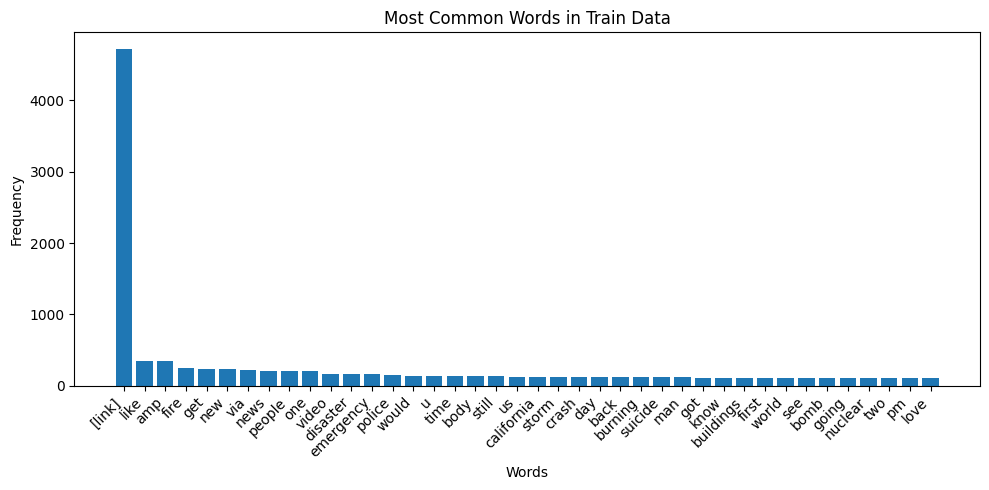

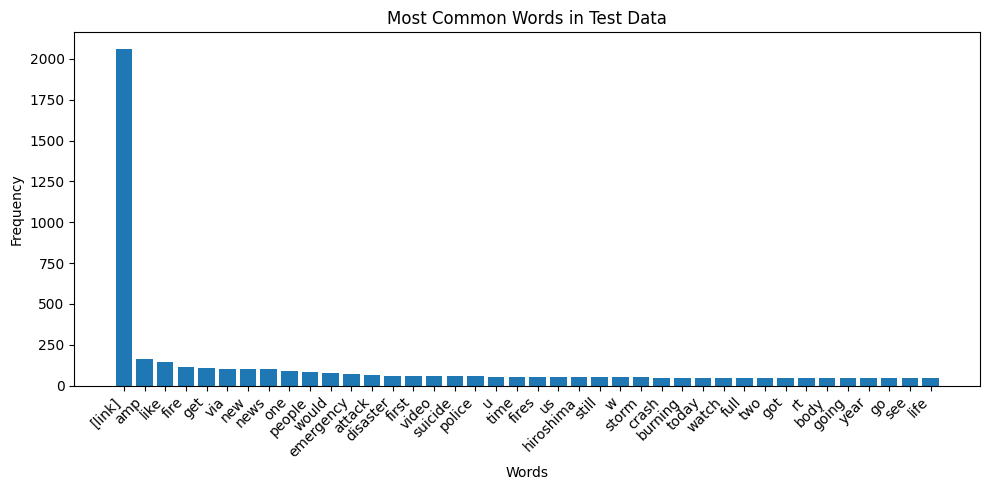

In [54]:
def get_most_common_words(df, text_column, n=40):
    # Combine all text into a single string
    text = " ".join(df[text_column].astype(str).tolist())
    words = text.split()
    word_counts = Counter(words)
    return word_counts.most_common(n)

def plot_most_common_words(common_words, title):
  words, counts = zip(*common_words)
  plt.figure(figsize=(10, 5))
  plt.bar(words, counts)
  plt.title(title)
  plt.xlabel("Words")
  plt.ylabel("Frequency")
  plt.xticks(rotation=45, ha='right')
  plt.tight_layout()
  plt.show()

# Get most common words
train_common_words = get_most_common_words(train_df, 'text')
test_common_words = get_most_common_words(test_df, 'text')

#Show dataframe info
train_df.info()
print("\n")
test_df.info()

# Diagrams
plot_most_common_words(train_common_words, "Most Common Words in Train Data")
plot_most_common_words(test_common_words, "Most Common Words in Test Data")

# Observations
`[link]` became the most common word, so we might as well remove it.

In [57]:
train_df['text'] = train_df['text'].apply(lambda t: clean_tweet(t, remove_stopwords=True, stop_words= stop_words, replace_links=""))
test_df['text'] = test_df['text'].apply(lambda t: clean_tweet(t, remove_stopwords=True, stop_words= stop_words, replace_links=""))

# Encoding the data
We use the GloVe model for encoding the data.

In [51]:
!wget -nc -q http://nlp.stanford.edu/data/glove.6B.zip
!unzip -n glove.6B.zip

Archive:  glove.6B.zip




## GloVe
GloVe, which stands for Global Vectors for Word Representation, is a popular word embedding technique that captures semantic relationships between words in a vector space. This model is a straightforward word-vectorization model, which uses a 50-dimensional vector for each word. In this model (as in other word-vector models), each word is represented by an
n-dimensional vector. The "distance" between vectors represents the similarity between words. Distance is calculated using the Pythagorean theorem, as the square root of the sum of squared differences. For instance, the distance between words like "mug" and "cup" is small, as they are similar and can often be used interchangeably in a sentence. However, words like "tractor" and "skyscraper" are positioned far apart in the vector space due to their distinct meanings.

There are, of course, other word-to-vector models, but we chose GloVe for our initial attempt due to its simplicity and ease of use. We will train our first prediction model using this. Later, to potentially improve accuracy, we may switch to Word2Vec, which can use vectors with dimensions of 100, 200, or even 300 for greater precision.


In [61]:
import numpy as np
# Glove_model is a word-vector dictionary
def load_glove_model(file_path):
  glove_model = {}
  with open(file_path, 'r', encoding='utf-8') as f:
    # assign a vector to each word
    for line in f:
      values = line.split(' ')
      word = values[0]
      vector = np.asarray(values[1:], dtype='float32')
      glove_model[word] = vector
  return glove_model

In [60]:
glove_path = 'glove.6B.100d.txt'
glove_model = load_glove_model(glove_path)

# Get vector for word 'python'
print(f"Here's the word python in vector representation:\n {glove_model['python']}")
print(f"length: {len(glove_model['python'])}")

Here's the word python in vector representation:
 [ 0.24934    0.68318   -0.044711  -1.3842    -0.0073079  0.651
 -0.33958   -0.19785   -0.33925    0.26691   -0.033062   0.15915
  0.89547    0.53999   -0.55817    0.46245    0.36722    0.1889
  0.83189    0.81421   -0.11835   -0.53463    0.24158   -0.038864
  1.1907     0.79353   -0.12308    0.6642    -0.77619   -0.45713
 -1.054     -0.20557   -0.13296    0.12239    0.88458    1.024
  0.32288    0.82105   -0.069367   0.024211  -0.51418    0.8727
  0.25759    0.91526   -0.64221    0.041159  -0.60208    0.54631
  0.66076    0.19796   -1.1393     0.79514    0.45966   -0.18463
 -0.64131   -0.24929   -0.40194   -0.50786    0.80579    0.53365
  0.52732    0.39247   -0.29884    0.009585   0.99953   -0.061279
  0.71936    0.32901   -0.052772   0.67135   -0.80251   -0.25789
  0.49615    0.48081   -0.68403   -0.012239   0.048201   0.29461
  0.20614    0.33556   -0.64167   -0.64708    0.13377   -0.12574
 -0.46382    1.3878     0.95636   -0.067869 